In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import pickle

In [2]:
df_train = pd.read_csv('../data/processed/clean_train_data.csv')
df_test = pd.read_csv('../data/processed/clean_test_data.csv')

In [3]:
reg = setup(data = df_train, 
                   train_size=0.8,  
                   target = 'SalePrice', 
                   session_id=42,
                  )

,Description,Value
0,session_id,42
1,Target,SalePrice
2,Original Data,"(1326, 54)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,37
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1060, 209)"


In [6]:
best = compare_models(include= ['rf', 
                                'gbr', 
                                'dt', 
                                'lr', 
                                'ada',
                                'lasso'
                               ])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2417,0.1198,0.3445,0.8762,0.1711,1.1057,0.1630
rf,Random Forest Regressor,0.2582,0.1432,0.3768,0.8529,0.1836,1.1122,0.4290
ada,AdaBoost Regressor,0.3351,0.2082,0.4539,0.7856,0.2237,1.6426,0.1280
dt,Decision Tree Regressor,0.3865,0.3047,0.5497,0.6869,0.2554,1.7425,0.0160
lasso,Lasso Regression,0.7643,0.9858,0.9906,-0.0102,0.5901,1.0405,0.0100
lr,Linear Regression,0.6219,11.8384,2.5232,-11.3513,0.3229,1.9251,0.0240


In [7]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2575,0.1229,0.3505,0.8920,0.1706,1.3155
1,0.2741,0.1639,0.4049,0.8221,0.1896,2.5489
2,0.2028,0.0842,0.2902,0.9051,0.1422,0.5044
3,0.2390,0.1388,0.3726,0.8631,0.1741,0.6408
4,0.2326,0.1103,0.3321,0.8808,0.1574,0.5874
5,0.2487,0.1290,0.3592,0.8444,0.1756,1.5970
6,0.2329,0.1047,0.3236,0.8796,0.1705,0.7581
7,0.2674,0.1424,0.3774,0.8926,0.1875,0.6698
8,0.2235,0.0919,0.3031,0.9036,0.1589,1.7642


In [8]:
tune_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2508,0.1352,0.3677,0.8812,0.1642,1.5240
1,0.2465,0.1416,0.3762,0.8464,0.1799,3.2621
2,0.2120,0.0840,0.2898,0.9054,0.1520,0.6376
3,0.2552,0.1547,0.3933,0.8475,0.1793,0.6385
4,0.2378,0.1087,0.3298,0.8824,0.1584,0.5744
5,0.2478,0.1248,0.3533,0.8495,0.1863,1.7618
6,0.2299,0.1220,0.3493,0.8598,0.1687,0.6001
7,0.2684,0.1538,0.3921,0.8841,0.1875,0.5812
8,0.2104,0.0986,0.3140,0.8965,0.1492,1.7417


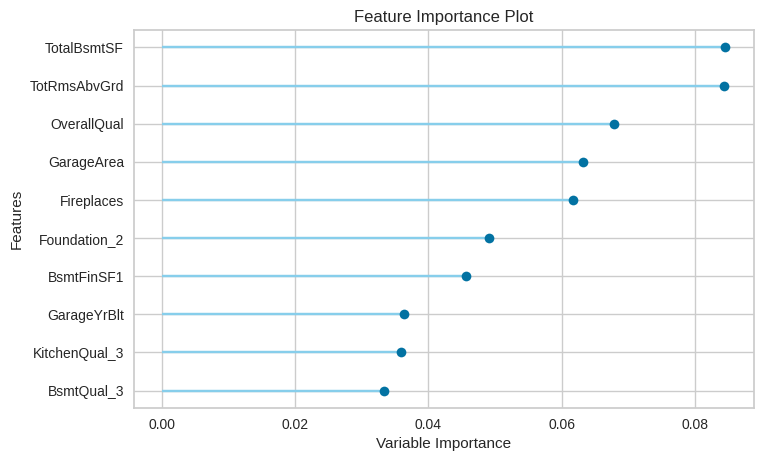

In [9]:
plot_model(tune_gbr, plot='feature')

In [10]:
model = finalize_model(tune_gbr)
predictions = predict_model(model, data = df_test)

In [11]:
predictions.index.values

array([   0,    1,    2, ..., 1316, 1317, 1318])

In [12]:
predictions['Label']

0      -0.785120
1      -0.300539
2      -0.096078
3       0.065810
4       0.151114
          ...   
1314   -0.552209
1315   -1.317436
1316   -1.370018
1317   -0.365469
1318    0.522011
Name: Label, Length: 1319, dtype: float64

In [13]:
picklefile = open('../models/data-cleaning-models/scaler_y.pkl', 'rb')
scaler_y = pickle.load(picklefile)

In [14]:
scaler_y

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaler_y.inverse_transform(predictions['Label'])

array([128703.88701501, 162370.20641713, 176575.17340693, ...,
        88068.05954534, 157859.20442439, 219516.93727912])

In [17]:
file = open('../models/ml-models/final_gbr.pkl', 'wb')
pickle.dump(model, file)

In [18]:
pred = pd.DataFrame({
        "SalePrice": scaler_y.inverse_transform(predictions['Label'])
    })
pred.to_csv('../data/prediction/predictions.csv', index=False)